In [51]:
import pandas as pd
import numpy as np
import matplotlib as mp

df=pd.ExcelFile(r'G:\TROP ICSU INTERNSHIP\China-CO2.xlsx',engine='openpyxl')

df = pd.read_excel(df, 'China-CO2-data')
#df2 = pd.read_excel(xls, 'Sheet2')
df


,iso_code,year,co2,co2_growth_prct
0,CHN,1751,0.000,NaN
1,CHN,1752,0.000,NaN
2,CHN,1753,0.000,NaN
3,CHN,1754,0.000,NaN
4,CHN,1755,0.000,NaN
...,...,...,...,...
261,CHN,2014,9820.360,0.243
262,CHN,2015,9716.468,-1.058
263,CHN,2016,9704.479,-0.123
264,CHN,2017,9838.754,1.384


In [52]:
import pandas as pd
df = pd.read_excel(r'G:\TROP ICSU INTERNSHIP\China-CO2.xlsx',sheet_name = "China-CO2-data",skiprows=range(1,150),engine='openpyxl')
df


,iso_code,year,co2,co2_growth_prct
0,CHN,1902,0.095,0.000
1,CHN,1903,1.964,1961.538
2,CHN,1904,2.088,6.343
3,CHN,1905,2.297,10.000
4,CHN,1906,17.111,644.817
...,...,...,...,...
112,CHN,2014,9820.360,0.243
113,CHN,2015,9716.468,-1.058
114,CHN,2016,9704.479,-0.123
115,CHN,2017,9838.754,1.384


In [53]:
df['co2_growth_prct'][0]=0.01


<ipython-input-53-35e8a9cadbe7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['co2_growth_prct'][0]=0.01


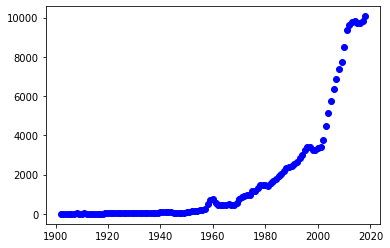

In [54]:
import matplotlib.pyplot as plt
plt.scatter(df['year'],df['co2'],color='blue')
plt.show()

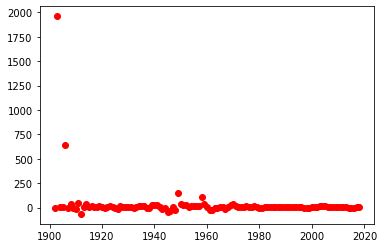

In [55]:
plt.scatter(df['year'],df['co2_growth_prct'],color='red')
plt.show()
x=[]
y=[]
x=df['year'].to_numpy()
y=df['co2'].to_numpy()
X = df.iloc[:, 1:2].values

y.shape
y1=df['co2_growth_prct'].to_numpy()

Estimated coefficients:
b_0 = -127261.4302050189   
b_1 = 65.84592892895174
RMSE VALUE is 1705.0661924295737


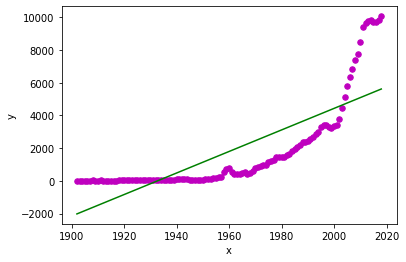

Estimated coefficients:
b_0 = 2211.1676286971633   
b_1 = -1.1127975168217692
RMSE VALUE is 186.19235733765598


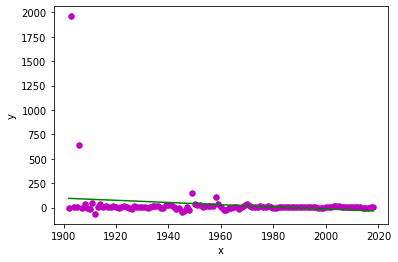

In [56]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import metrics
import math
import sklearn
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 
    
def rmse(b,y):
    predict=[]
    for i in range(0,117):
        predict.append(b[0]+b[1]*x[i])
    predict=np.array(predict)
    mse = sklearn.metrics.mean_squared_error(y, predict)
    return(math.sqrt(mse))

  
def main(x,y): 
    # observatio # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}   \nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    print("RMSE VALUE is",rmse(b,y))
    plot_regression_line(x, y, b)
    
    

    



    
  
if __name__ == "__main__": 
    main(x,y)
    main(x,y1)
    

RMSE Value 439.9513647326317


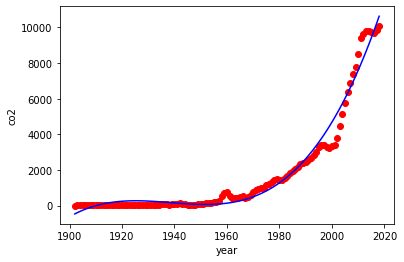

In [57]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(sklearn.metrics.mean_squared_error(y,y_poly_pred))

print("RMSE VALUE BY polynomial METHOD CO2",rmse)
# Visualizing the Polymonial Regression results
def viz_polymonial(Y):
    plt.scatter(X,Y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.xlabel('year')
    plt.ylabel('co2')
    plt.show()
    return
viz_polymonial(y)

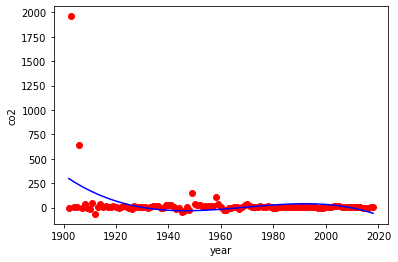

RMSE Value is: 175.75896313293705


In [58]:
from sklearn.metrics import mean_squared_error
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y1)

# Visualizing the Polymonial Regression results
viz_polymonial(y1)


polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y1)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y1,y_poly_pred))

print("RMSE VALUE BY Polynomial METHOD CO2 growth :",rmse)


In [59]:


log_x_data = np.log(x)
log_y_data = np.log(y)

curve_fit = np.polyfit(x, log_y_data, 1)
print(curve_fit)





[ 6.85391348e-02 -1.28668223e+02]


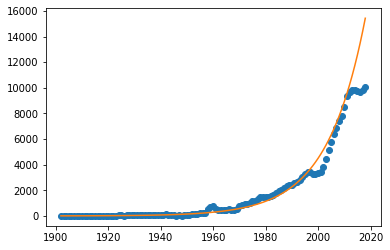

In [60]:
ye = np.exp(-1.28668223e+02) * np.exp(6.85391348e-02*x)
plt.plot(x, y, "o")
plt.plot(x, ye)
    


In [64]:

    predict=[]
    for i in range(0,117):
        predict.append(np.exp(-1.28668223e+02) * np.exp(6.85391348e-02*x[i]))
    predict=np.array(predict)
    mse = sklearn.metrics.mean_squared_error(y, predict)
    print("RMSE VALUE BY EXPONENTIAL METHOD CO2:"math.sqrt(mse))


873.0513723393249


In [62]:
log_x = np.log(x)
log_y = np.log(y1)

curve_fit = np.polyfit(x, log_y, 1)
print(curve_fit)


[nan nan]


<ipython-input-62-24426353f4bd>:2: RuntimeWarning: invalid value encountered in log
  log_y = np.log(y1)
